<a href="https://colab.research.google.com/github/IT24102088/Plant-Disease-Detection-System-PG-NO-147/blob/main/Notebooks/Image_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Normalization

Normalizing image pixel values is important because raw images usually have pixel intensities ranging from 0 to 255. Feeding these large, unscaled values directly into a deep learning model can slow down training and make optimization unstable.



*   Smaller, consistent input values help the optimizer (like AdamW) adjust weights more efficiently.

*   Prevents very large gradient updates that can cause exploding gradients.
*   Ensures no feature dominates simply because of higher numeric magnitude.


*   Many functions (like sigmoid or tanh) work best when inputs are in these small ranges.

In short, normalization makes the training process smoother, faster, and more accurate.



In [1]:
!pip install kaggle
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''



In [2]:
!kaggle datasets download -d "vipoooool/new-plant-diseases-dataset" -p /content/drive/MyDrive/datasets/

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from IPython.display import clear_output
!unzip /content/drive/MyDrive/datasets/new-plant-diseases-dataset.zip
clear_output()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns


image_path =  "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG"


try:
    img = Image.open(image_path)
    print(f"Image loaded successfully! Size: {img.size}, Mode: {img.mode}")


    img_array = np.array(img)
    print(f"Array shape: {img_array.shape}, Data type: {img_array.dtype}")
    print(f"Original value range: [{img_array.min()} to {img_array.max()}]")

except Exception as e:
    print(f"Error loading image: {e}")

Image loaded successfully! Size: (256, 256), Mode: RGB
Array shape: (256, 256, 3), Data type: uint8
Original value range: [21 to 255]


In [26]:

normalized_img = img_array / 255.0

print("\n--- After Normalization ---")
print(f"Normalized value range: [{normalized_img.min():.3f} to {normalized_img.max():.3f}]")
print(f"Normalized mean: {normalized_img.mean():.3f}")


--- After Normalization ---
Normalized value range: [0.082 to 1.000]
Normalized mean: 0.437


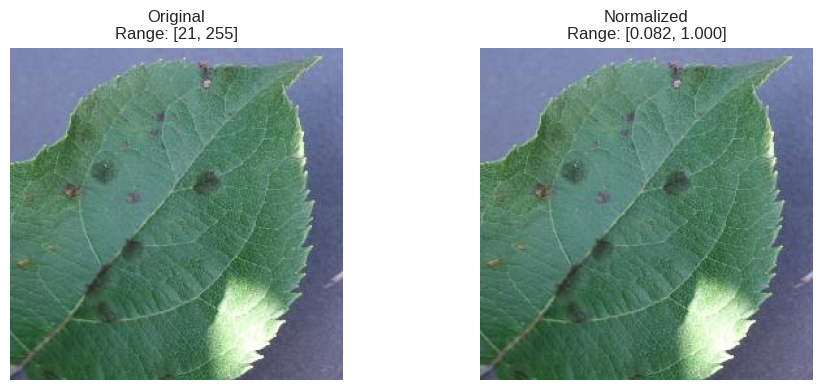

In [27]:

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title(f'Original\nRange: [{img_array.min()}, {img_array.max()}]')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img)
plt.title(f'Normalized\nRange: [{normalized_img.min():.3f}, {normalized_img.max():.3f}]')
plt.axis('off')

plt.tight_layout()
plt.savefig('normalization_comparison.png', bbox_inches='tight', dpi=120)
plt.show()

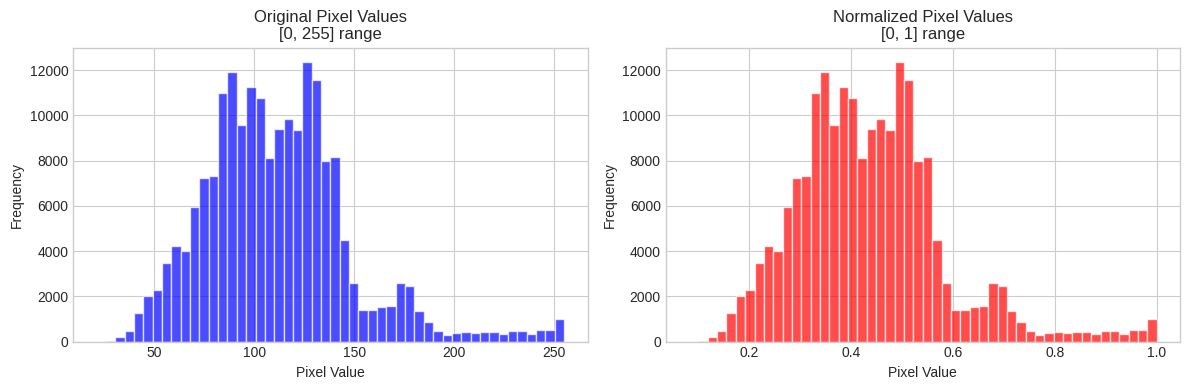

In [28]:
original_pixels = img_array.flatten()
normalized_pixels = normalized_img.flatten()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(original_pixels, bins=50, alpha=0.7, color='blue')
plt.title('Original Pixel Values\n[0, 255] range')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normalized_pixels, bins=50, alpha=0.7, color='red')
plt.title('Normalized Pixel Values\n[0, 1] range')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('pixel_histograms.png', bbox_inches='tight', dpi=120)
plt.show()

In [30]:
import pandas as pd

stats_data = {
    'Statistic': ['Min', 'Max', 'Mean', 'Standard Deviation'],
    'Original': [
        original_pixels.min(),
        original_pixels.max(),
        original_pixels.mean(),
        original_pixels.std()
    ],
    'Normalized': [
        normalized_pixels.min(),
        normalized_pixels.max(),
        normalized_pixels.mean(),
        normalized_pixels.std()
    ]
}

stats_df = pd.DataFrame(stats_data)
print("\nStatistical Comparison:")
print(stats_df)


Statistical Comparison:
            Statistic    Original  Normalized
0                 Min   21.000000    0.082353
1                 Max  255.000000    1.000000
2                Mean  111.429184    0.436977
3  Standard Deviation   36.922166    0.144793



--- Analyzing Image 1 ---


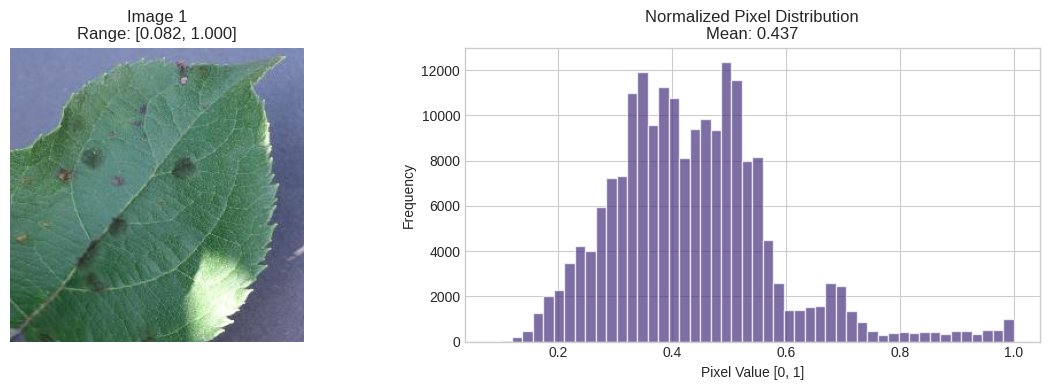


--- Analyzing Image 2 ---


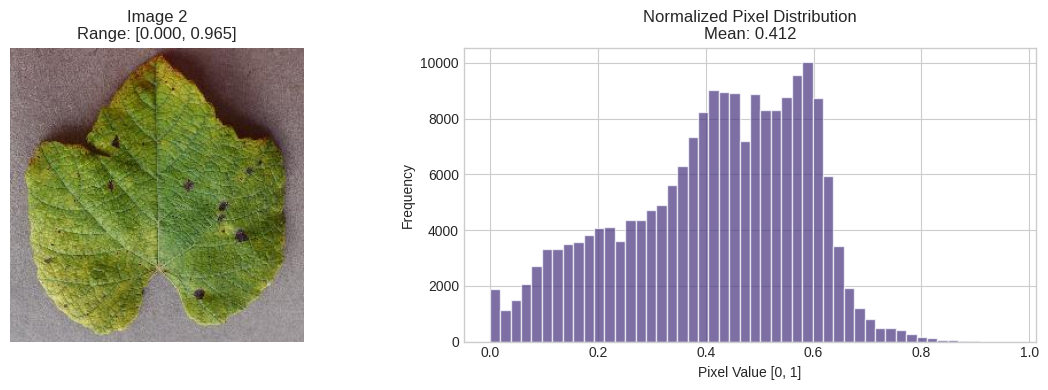


--- Analyzing Image 3 ---


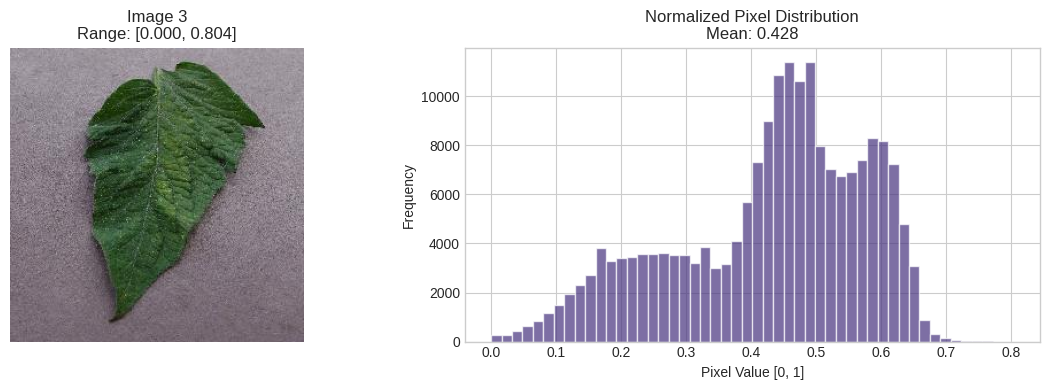

In [31]:
image_paths = [
        "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG",
    "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/002e4d32-15cf-4350-bfba-dde7c8992392___FAM_L.Blight 4740.JPG",
    "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite/00bc7858-1dca-4bfb-a828-225f03bd72a5___Com.G_SpM_FL 9455_flipTB.JPG"
]

for i, path in enumerate(image_paths):
    try:
        print(f"\n--- Analyzing Image {i+1} ---")
        img = Image.open(path)
        img_array = np.array(img)
        normalized_img = img_array / 255.0


        plt.figure(figsize=(12, 4))


        plt.subplot(1, 2, 1)
        plt.imshow(normalized_img)
        plt.title(f'Image {i+1}\nRange: [{normalized_img.min():.3f}, {normalized_img.max():.3f}]')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.hist(normalized_img.flatten(), bins=50, alpha=0.7)
        plt.title(f'Normalized Pixel Distribution\nMean: {normalized_img.mean():.3f}')
        plt.xlabel('Pixel Value [0, 1]')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.savefig(f'image_{i+1}_analysis.png', bbox_inches='tight', dpi=120)
        plt.show()

    except Exception as e:
        print(f"Error with {path}: {e}")